## IIb- Processing diagnostic keywords
### Aim

Now that the labels have been processed, I will focus on the diagnostic keywords.

However, prior going further with the diagnostic keywords, I decide to split the left- and right- fundi apart.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('Temp_df.csv', index_col=[0])
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,Labels
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,Cataract
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,Diabetes-Others
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1,Others
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,Diabetes-Others


### A. Split left and right eye fundi

In [2]:
## In a temporary dataframe (df_left), I keep all left fundi-related info
df_left=df.drop(['Right-Fundus', 'Right-Diagnostic Keywords'],axis=1)
df_left = df_left.rename({'Left-Fundus': 'Fundus', 'Left-Diagnostic Keywords': 'Diagnostic Keywords'}, axis=1)
df_left=df_left.drop_duplicates(keep='first', inplace=False, ignore_index=False)
#df_left.head()

## Same goes for right fundi (df_right)
df_right=df.drop(['Left-Fundus', 'Left-Diagnostic Keywords'],axis=1)
df_right = df_right.rename({'Right-Fundus': 'Fundus', 'Right-Diagnostic Keywords': 'Diagnostic Keywords'}, axis=1)
df_right=df_right.drop_duplicates(keep='first', inplace=False, ignore_index=False)
#df_right.head()

## Then I put both df_left and df_right back together
df_split= pd.concat([df_left, df_right], axis=0, join="inner").sort_index()
df_split.head(8)

,ID,Patient Age,Patient Sex,Fundus,Diagnostic Keywords,N,D,G,C,A,H,M,O,Labels
0,0,69,Female,0_left.jpg,cataract,0,0,0,1,0,0,0,0,Cataract
0,0,69,Female,0_right.jpg,normal fundus,0,0,0,1,0,0,0,0,Cataract
1,1,57,Male,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal
1,1,57,Male,1_right.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal
2,2,42,Male,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,Diabetes-Others
2,2,42,Male,2_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,Diabetes-Others
3,3,66,Male,3_left.jpg,normal fundus,0,0,0,0,0,0,0,1,Others
3,3,66,Male,3_right.jpg,branch retinal artery occlusion,0,0,0,0,0,0,0,1,Others


### B. Split and individualize <i>diagnostic keywords</i>.

As seen above for the patient with the ID #2, some eye fundi have been assigned with several <i>diagnostic keywords</i>.

In order to later identify which <i>diagnostic keywords</i> correspond to which <i>label</i> combination, I need to split them as well.

In [4]:
# Split the term based on the coma sign and "explode" the line so each keywords are now fully individualized
df=df_split.assign(var1=df_split['Diagnostic Keywords'].replace(',','，').str.split('，')).explode('var1')
df.rename(columns = {'var1':'Keywords'}, inplace = True)
df.loc[2]

,ID,Patient Age,Patient Sex,Fundus,Diagnostic Keywords,N,D,G,C,A,H,M,O,Labels,Keywords
2,2,42,Male,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,Diabetes-Others,laser spot
2,2,42,Male,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,Diabetes-Others,moderate non proliferative retinopathy
2,2,42,Male,2_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,Diabetes-Others,moderate non proliferative retinopathy


Here we can see that the patient with the ID #2 is now represented by 3 lines, 1 for the right fundus and 2 for the left fundus given that there was 2 <i>diagnositic keywords</i> associated with it. 

Now that the <i>diagnositic keywords</i> and the right- and left- fundi are all individualized, we can look at the details of our new dataframe.

Thus, I will:
- check the shape of the new dataframe (which should be at least twice as long as the original one), 
- check the number of individual <i>diagnositic keywords</i>,
- assess the weight of the top <i>diagnositic keywords</i> compare to the over all,
- keep the top <i>diagnositic keywords</i> in order to keep 95% or more of the datast. 

In [14]:
# Shape of the dataframe:
print('Shape of the new dataframe :', df.shape,'\n')

# Number of diagnostic keywords:
print("There are",len(pd.unique(df['Keywords'])),"unique diagnostic keywords in total, of which :") 

# Weight of the top diagnostic keywords:
print('--> the first 19 keywords cover',round(df['Keywords'].value_counts(normalize=True).head(19).sum(),4)*100,'% of the whole dataset, with each keywords representing a weight of at least 4%,')   
print('--> the first 31 keywords cover',round(df['Keywords'].value_counts(normalize=True).head(31).sum(),4)*100,'% of the whole dataset, with each keywords representing a weight of at least 2%,')   
print('--> the first 37 Keywords cover',df['Keywords'].value_counts(normalize=True).head(37).round(3).sum()*100,'% of the whole dataset, with each keywords representing a weight of at least 1%.')   

# Show table all diagnostic keywords and their weight:
print('\033[1m\nWeight of each individual diagnostic keywords \ncompare to the all keywords:\033[0m')
Diagkwds1=pd.DataFrame(df['Keywords'].value_counts(normalize=True).round(4)*100)
Diagkwds1

Shape of the new dataframe : (7459, 15) 

There are 94 unique diagnostic keywords in total, of which :
--> the first 19 keywords cover 94.14 % of the whole dataset, with each keywords representing a weight of at least 4%,
--> the first 31 keywords cover 97.6 % of the whole dataset, with each keywords representing a weight of at least 2%,
--> the first 37 Keywords cover 98.4 % of the whole dataset, with each keywords representing a weight of at least 1%.

Weight of each individual diagnostic keywords 
compare to the all keywords:


,Keywords
normal fundus,41.44
moderate non proliferative retinopathy,12.41
mild nonproliferative retinopathy,7.07
lens dust,5.27
cataract,3.15
pathological myopia,3.03
glaucoma,2.94
macular epiretinal membrane,2.59
dry age-related macular degeneration,2.44
epiretinal membrane,2.43


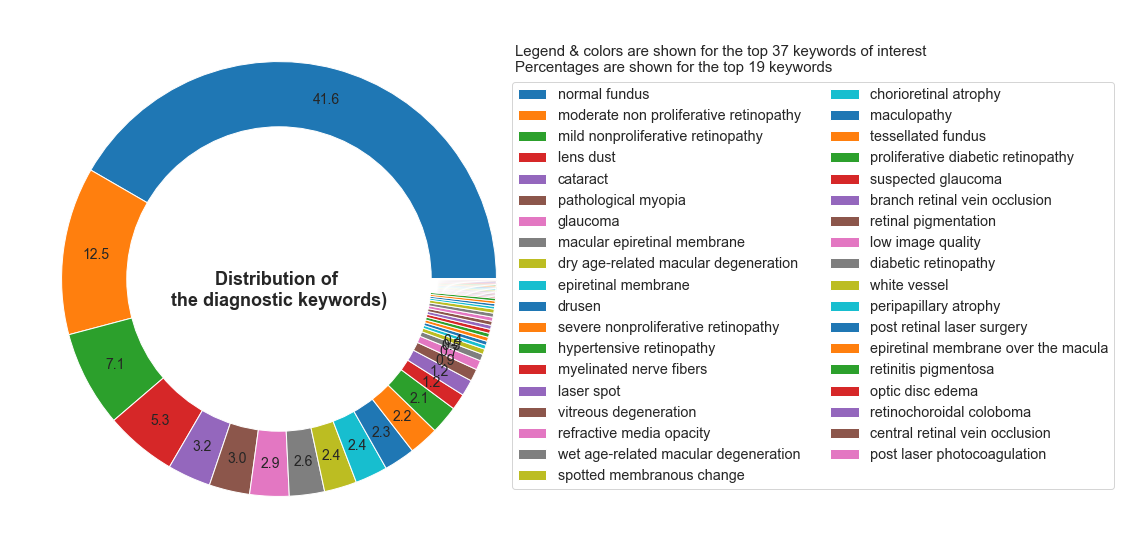

In [25]:
# Visualization of the top 37 diagnostic keywords and their weight:
# imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# List all keywords to plot on the pie chart:
pie=pd.DataFrame(df['Keywords'].value_counts(normalize=True).round(3)*100)

# Function to only keep the weight (in percentage) of the top 19 keywords:
def autopct(pct):
    return ('%1.1f' % pct) if pct > 0.4 else '' # 0.4 is an arbitraty threshold. 
                                                # It corresponds threshold above which each keywords weights more than 4% of all keywords
                                                # Set this threshold to 0.1 to see all top 37 keywords I'll keep.
    
# Set layout:
fig = plt.figure(figsize=(10,10))

# Plot data:
plt.pie(x=pie['Keywords'], labeldistance=1.05, textprops={'fontsize': 14}, autopct=autopct, pctdistance=0.85)

# Adjust design: 
plt.title("Distribution of \nthe diagnostic keywords)",fontsize= 18, fontweight='bold', y=0.44)
plt.suptitle("\nLegend & colors are shown for the top 37 keywords of interest\nPercentages are shown for the top 19 keywords", ha='left', fontsize= 15, x=0.84, y=0.85)
plt.legend(labels=pie.head(37).index, bbox_to_anchor=(2.05,0.1), loc="lower right", fontsize = 'x-large',ncol=2)

# Add center circle to give it a donut look:
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Show:
plt.show();

Again, as a matter of practicality, I will focus on top 37 <i>diagnositic keywords</i> out of 94, representing over 98% of the whole dataset.

In [21]:
## Keep top 37 keywords out of 94 unique diagnostic keywords (= drop last 57) :
drop_kywds=df['Keywords'].value_counts(normalize=True).tail(57).round(4).reset_index().set_index('index')*100
dropk=list(drop_kywds.index)
df1= df[~df.Keywords.isin(dropk)]
# Shape of the newly processed dataset:
print("\nShape of the new dataframe:", df1.shape)
print("There is now",len(pd.unique(df1['Keywords'])),"unique diagnostic keywords in total.\n")
# Show first lines:
df1.head()


Shape of the new dataframe: (7343, 15)
There is now 37 unique diagnostic keywords in total.



,ID,Patient Age,Patient Sex,Fundus,Diagnostic Keywords,N,D,G,C,A,H,M,O,Labels,Keywords
0,0,69,Female,0_left.jpg,cataract,0,0,0,1,0,0,0,0,Cataract,cataract
0,0,69,Female,0_right.jpg,normal fundus,0,0,0,1,0,0,0,0,Cataract,normal fundus
1,1,57,Male,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal,normal fundus
1,1,57,Male,1_right.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal,normal fundus
2,2,42,Male,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,Diabetes-Others,laser spot


In [ ]:
# Save this temporary dataset
df1.to_csv('Temp2_df.csv')